In [2]:
import pickle
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from scipy import ndimage as nd
import random 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
dir = "C:\\Users\\youssef\\Desktop\\svm data"
data = []
categories = ["diseased p0", "diseased p1" , "diseased p2",
              "diseased p3", "diseased p5" , "diseased p6",
              "diseased p7","diseased p9", "diseased p10" ,
              "diseased p11",
              "healthy p0" ,  "healthy p1" ,"healthy p2",
              "healthy p3" ,  "healthy p5" ,"healthy p6",
              "healthy p7","healthy p9" ,  "healthy p10" ,
              "healthy p11",
             ]

#iterate all of image in directory for extract pixels values as a feature and label of each class
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        img = cv2.imread(imgpath, 1)
        img = cv2.resize(img,(150,150))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        flatten_img = np.array(img).flatten()
        data.append([flatten_img, label])
        

In [4]:
#shuffling the data and seperate the feature and label
random.shuffle(data)
features = []
labels = []
for feature,label in data:
    features.append(feature)
    labels.append(label)


In [5]:
#split the data into train and test 
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.1)

In [6]:
#initializing the first model svc
model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain),

(SVC(C=1, gamma='auto', kernel='poly'),)

In [7]:
#found out prediction for test data and testing acc for test data 
pred = model.predict(xtest)
accuracy = model.score(xtest, ytest)
print('accuracy of svm model= ', accuracy)

accuracy of svm model=  0.7518796992481203


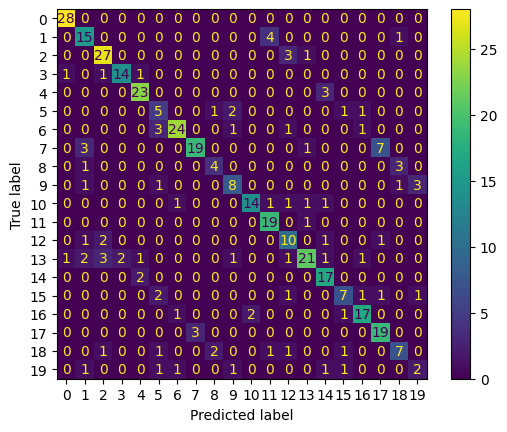

In [12]:
#ploting the confusion matrix for the first model
conf_mat = confusion_matrix(ytest, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

plt.show()

In [13]:
#initializing random forest model
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [14]:
#finding the acc and preds for the second model
random_forest_perdictions = rmodel.predict(xtest)
random_forest_acc = rmodel.score(xtest,ytest)
print('accuracy of RF model= ', random_forest_acc)

accuracy of RF model=  0.8120300751879699


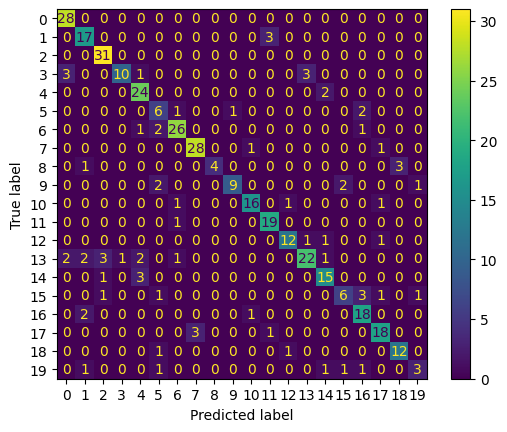

In [15]:
#plot confusion matrix for second model
cm = confusion_matrix(ytest, random_forest_perdictions)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, )
disp1.plot()

plt.show()

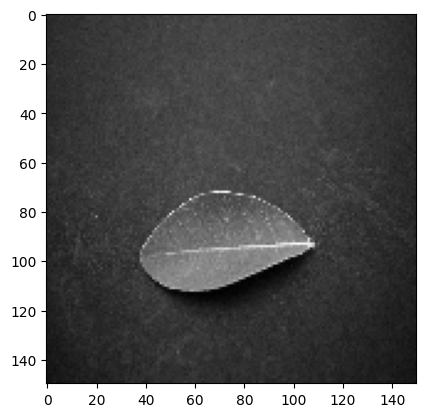

In [16]:
#plotting the predicted Value TO check 

plt.imshow(xtest[5].reshape(150,150), cmap='gray') 
plt.show()

In [17]:
# x = features[0].reshape(150,150)
# image = cv2.resize(x,(600,400))
# plt.imshow(image, cmap ="gray")
# plt.show

In [18]:
# myimg = "C:\\Users\\youssef\\Desktop\\svm data\\healthy p2\\0003_0021.JPG"
# readit = cv2.imread(myimg , 0)
# fin = cv2.resize(readit,(300,300))
# flat = np.array(fin).flatten()

# model.predict(flat.reshape(1, -1))

In [23]:
#for save the model to import it again without rerun the code one more time
pick_in = open('RF.pickle', 'wb')
pickle.dump(rmodel, pick_in)
pick_in.close
pick_in = open('RF.pickle', 'rb')
pickledmodel = pickle.load(pick_in)
pick_in.close

<function BufferedReader.close>

In [32]:
pickledmodel.predict(xtest[5].reshape(1, -1))

array([11])

In [33]:
ytest[5]

11